In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c, units as u

In [3]:
T_ground = 300*u.K
eps_ground = 1.
alpha_ground = 0.05

eps_dut = 0.8
alpha_dut = 0.2
A_dut = 1*u.m**2

F_solar = 1000*u.W/u.m**2

F_ground_IR = eps_ground * c.sigma_sb * np.power(T_ground, 4)
F_ground_opt = (1 - alpha_ground) * F_solar

In [5]:
P_in_below = A_dut * eps_dut * F_ground_IR + A_dut * alpha_dut * F_ground_opt
P_in_above = A_dut * alpha_dut * F_solar

In [7]:
P_out_fac = 2 * A_dut * eps_dut * c.sigma_sb

In [8]:
T_dut = np.power((P_in_below + P_in_above)/P_out_fac, 1/4).to(u.K)

In [10]:
T_dut - 273*u.K

<Quantity 29.27634819 K>

In [14]:
# Solar illumination
F_solar = (c.L_sun / (4*np.pi*(1*u.AU)**2)).to(u.W/u.m**2)

In [23]:
def T_simple(alpha_dut, eps_dut, A_dut = 1*u.m**2, T_ground = 300*u.K, eps_ground = 1, alpha_ground = 0.95, F_solar = F_solar, 
            solar_illum_frac = 1):
    
    F_ground_IR = eps_ground * c.sigma_sb * np.power(T_ground, 4)
    F_ground_opt = (1 - alpha_ground) * F_solar
        
    # Answer doesn't depend on A_dut; these are actually fluxes
    
    # From below we see the ground plus the reflected sunlight
    F_in_below = eps_dut * F_ground_IR + alpha_dut * F_ground_opt
    # From above we can see some fraction of the sun
    F_in_above = solar_illum_frac * alpha_dut * F_solar
    
    # radiates from top and bottom surfaces
    F_out_fac = 2 * eps_dut * c.sigma_sb
    
    T_dut = np.power((F_in_below + F_in_above)/F_out_fac, 1/4).to(u.K)
    
    return T_dut

In [25]:
T_simple(0.2, 0.8, T_ground = 270*u.K), T_simple(0.2, 0.8, solar_illum_frac=0, T_ground = 270.*u.K)

(<Quantity 276.060175 K>, <Quantity 230.1811266 K>)

In [57]:
alpha_v = np.linspace(0, 0.4, 31)
eps_v = np.linspace(0.6, 1, 30)
alpha, eps = np.meshgrid(alpha_v, eps_v) 

In [58]:
T_grid_sun = T_simple(alpha, eps, T_ground = 273*u.K, alpha_ground=0.95)
T_grid_shade = T_simple(alpha, eps, T_ground = 273*u.K, alpha_ground=0.95, solar_illum_frac=0)

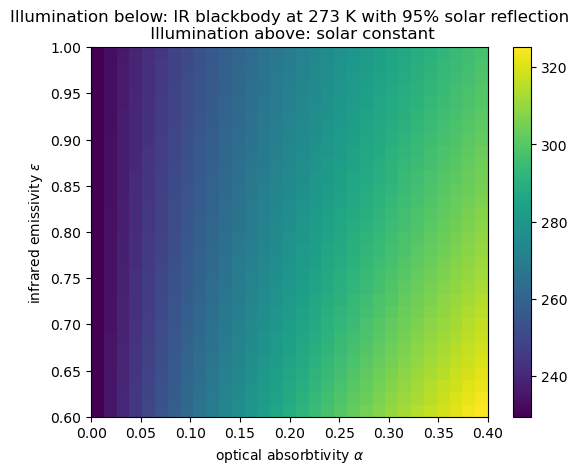

In [59]:
plt.imshow(T_grid_sun, aspect='auto', origin='lower', extent=[alpha_v[0], alpha_v[-1], eps_v[0], eps_v[-1]])
plt.xlabel(r'optical absorbtivity $\alpha$')
plt.ylabel(r'infrared emissivity $\epsilon$')
plt.title('Illumination below: IR blackbody at 273 K with 95% solar reflection\n Illumination above: solar constant')
plt.colorbar();

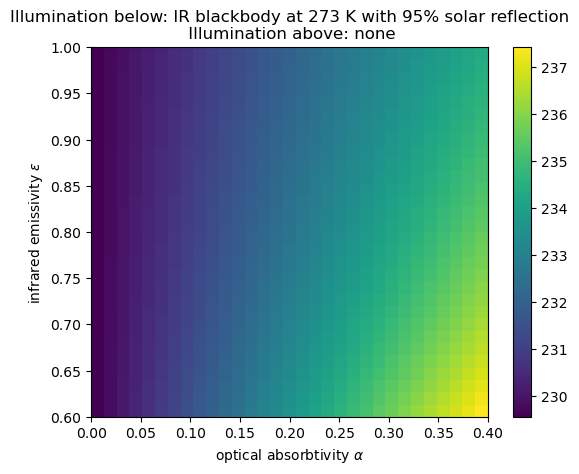

In [60]:
plt.imshow(T_grid_shade, aspect='auto', origin='lower', extent=[alpha_v[0], alpha_v[-1], eps_v[0], eps_v[-1]])
plt.xlabel(r'optical absorbtivity $\alpha$')
plt.ylabel(r'infrared emissivity $\epsilon$')
plt.title('Illumination below: IR blackbody at 273 K with 95% solar reflection\n Illumination above: none')
plt.colorbar();